In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/workspaces/Cost-of-living-index/Cost_of_Living_Index_by_Country_2024.csv')

X = data[['Rent Index', 'Groceries Index', 'Restaurant Price Index', 'Local Purchasing Power Index']]
y = data['Cost of Living Index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=0.95) 
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

model = LinearRegression()
model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

print(f"Number of PCA components used: {pca.n_components_}")

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Mean Squared Error: 9.101649572268592
R-squared Score: 0.9704808802006746
Number of PCA components used: 3
Explained Variance Ratio: [0.8019948  0.09438474 0.06348982]


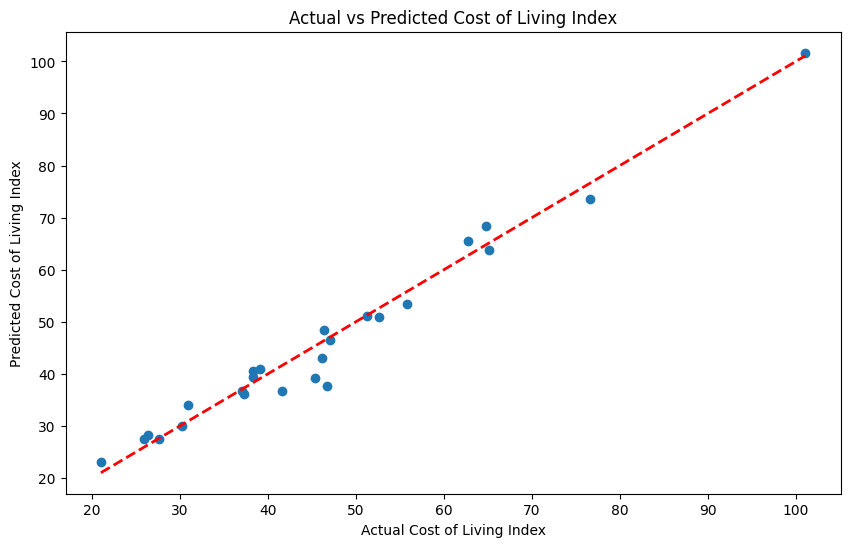

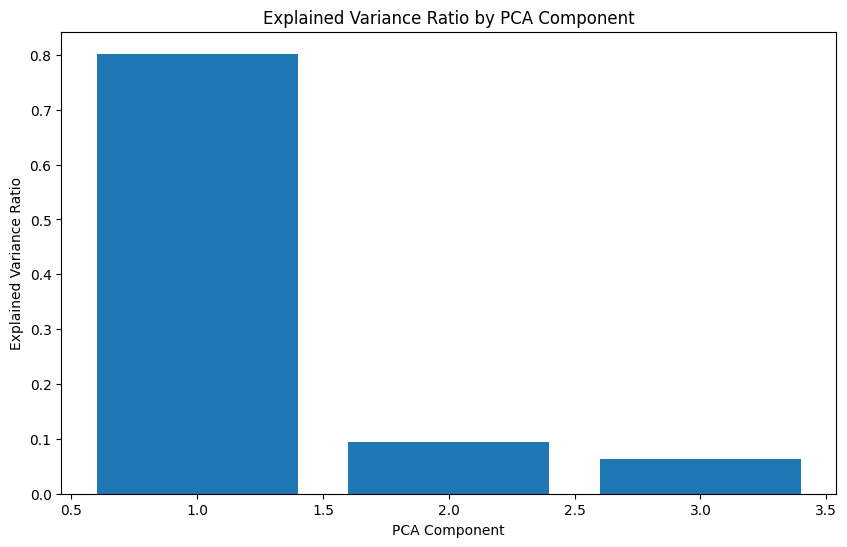

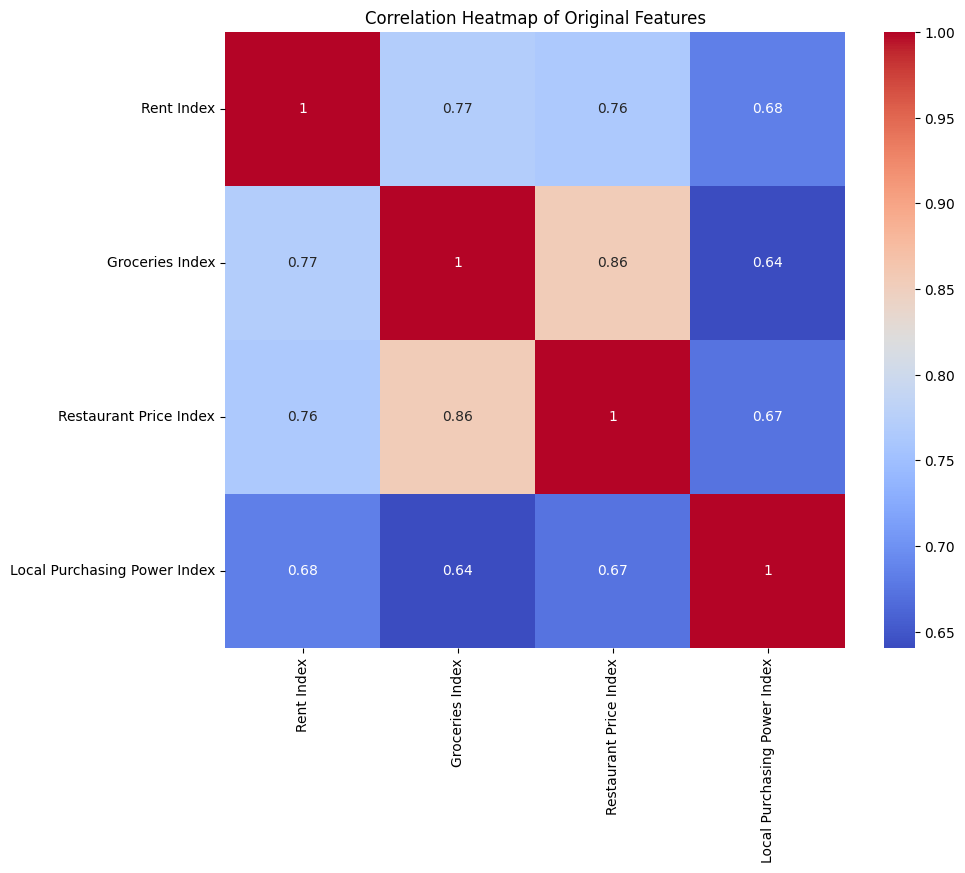

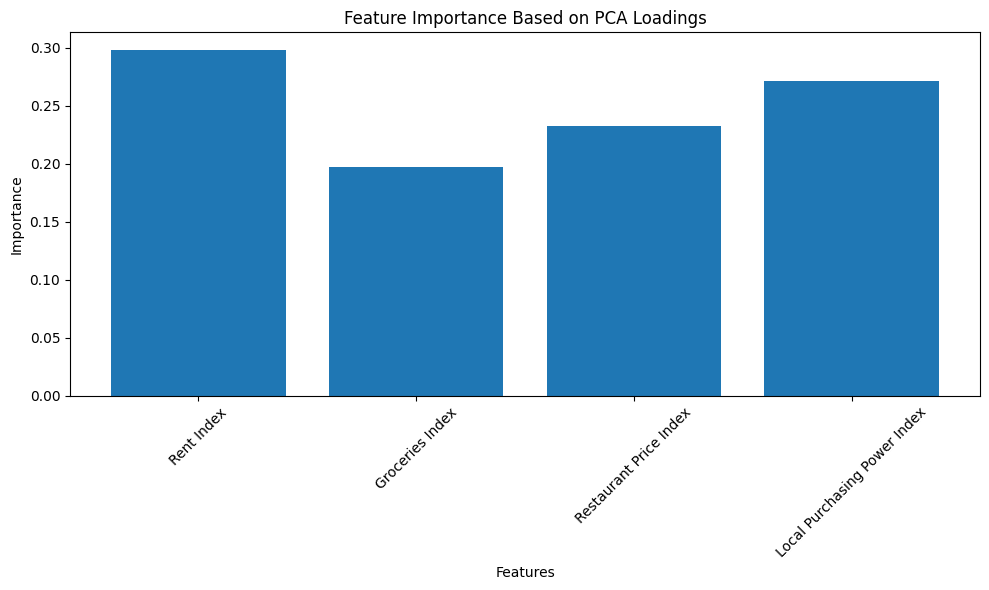

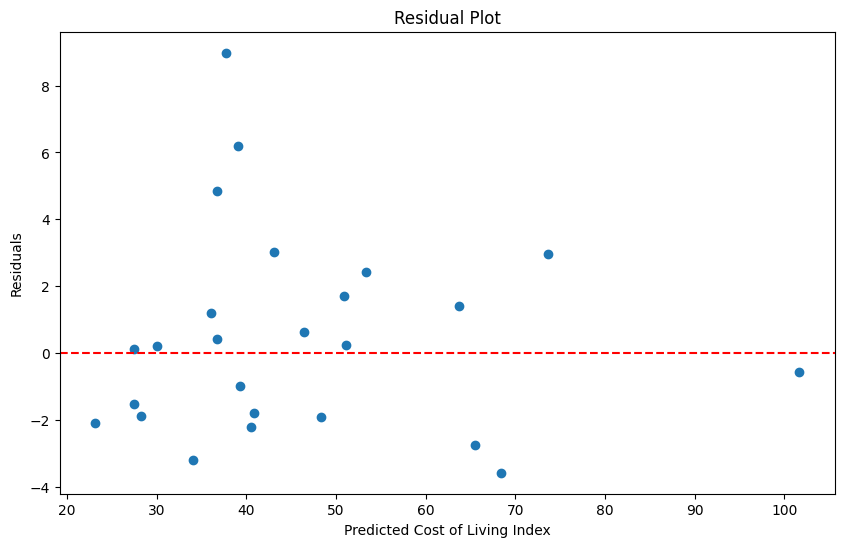

In [3]:
# Scatter plot of predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Cost of Living Index')
plt.ylabel('Predicted Cost of Living Index')
plt.title('Actual vs Predicted Cost of Living Index')
plt.show()

# Explained variance ratio plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('PCA Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by PCA Component')
plt.show()

# Correlation heatmap of original features
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Original Features')
plt.show()

# Feature importance
feature_importance = np.abs(pca.components_).sum(axis=0)
feature_importance = feature_importance / feature_importance.sum()
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Based on PCA Loadings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Cost of Living Index')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()